<a href="https://colab.research.google.com/github/shashwatrajvanshi/awesome-video-anomaly-detection/blob/master/CRACK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/My Drive/D')
!ls

CD  UD


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_width, img_height = 224, 224 #for consistency
# augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/D',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/D',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 10896 images belonging to 2 classes.
Found 2724 images belonging to 2 classes.


In [ ]:
pip install torch torchvision transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

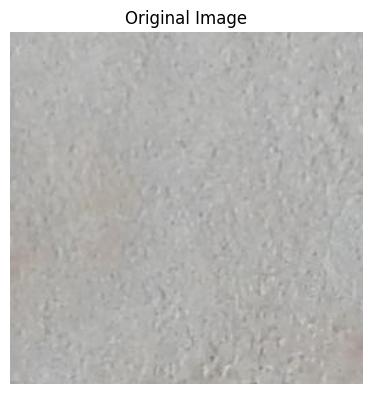

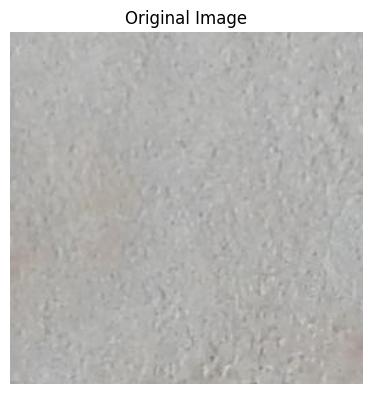

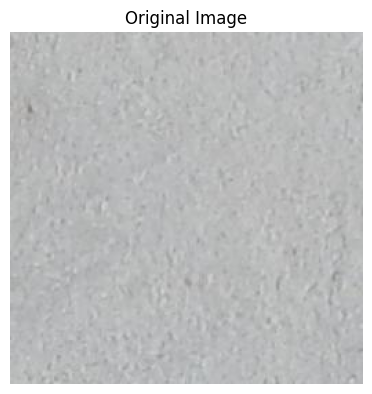

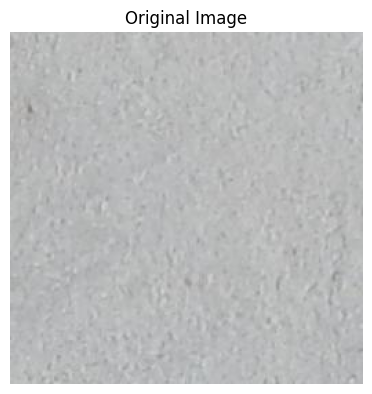

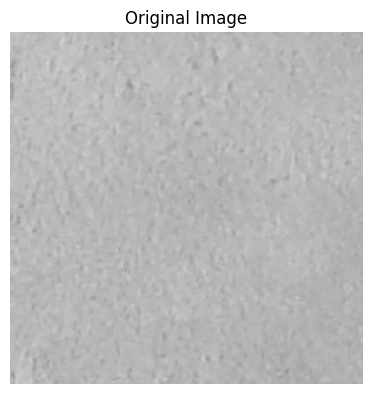

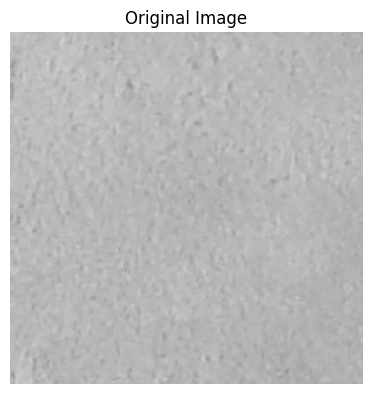

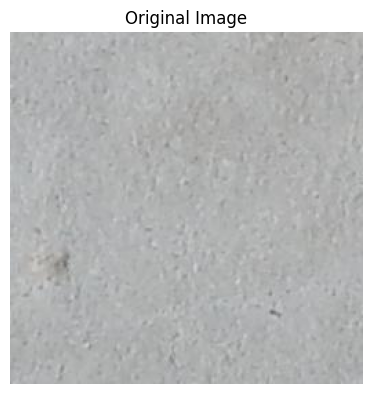

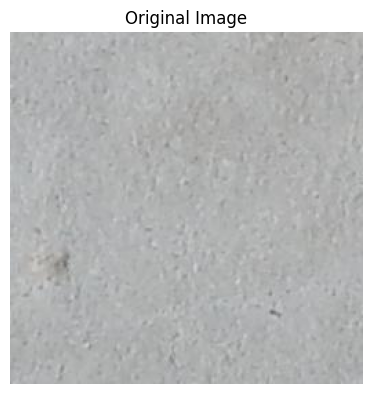

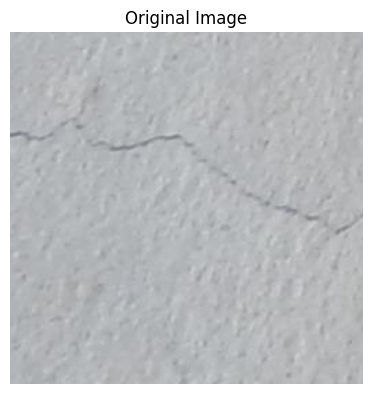

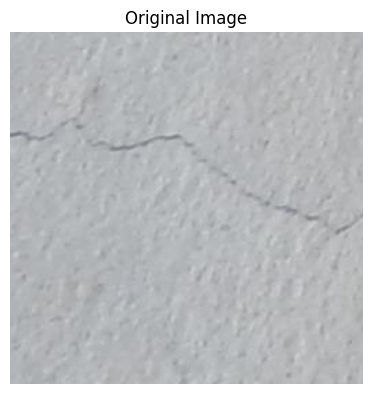

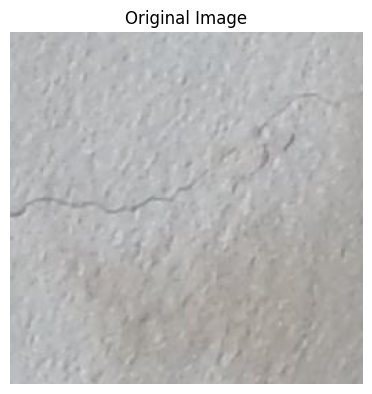

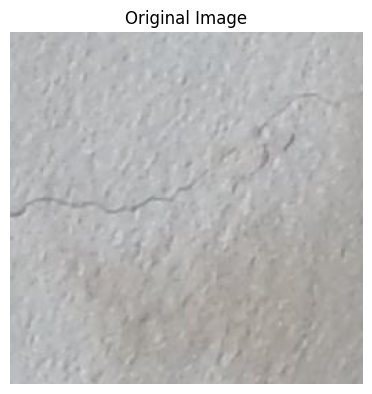

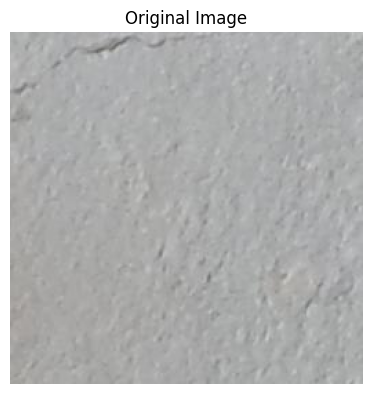

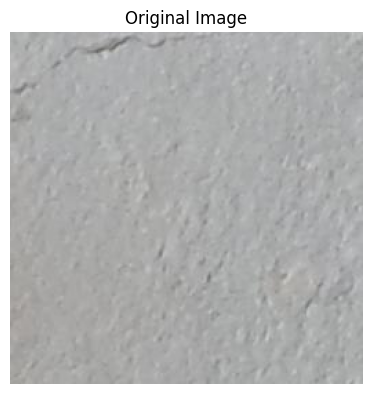

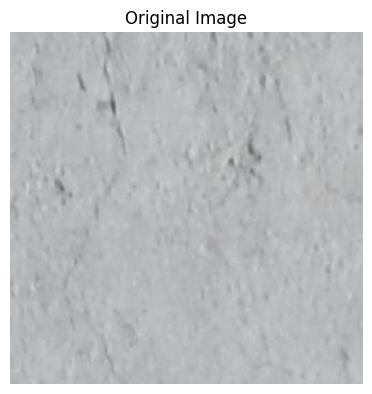

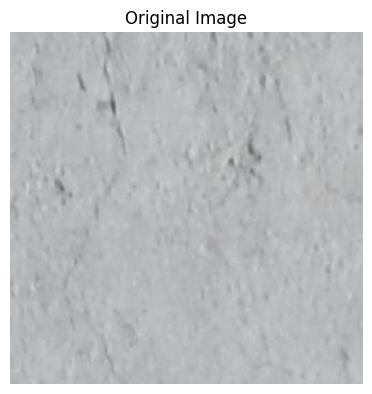

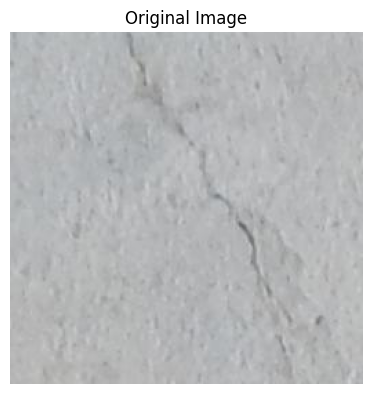

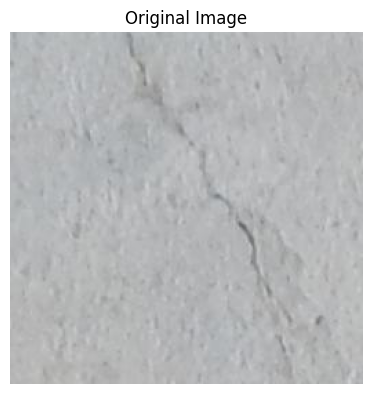

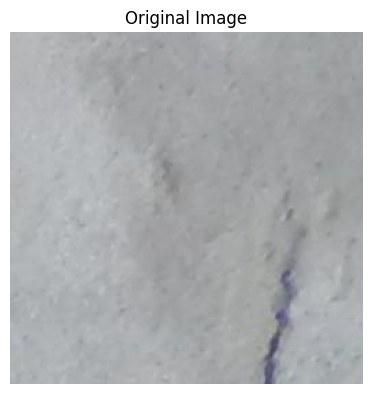

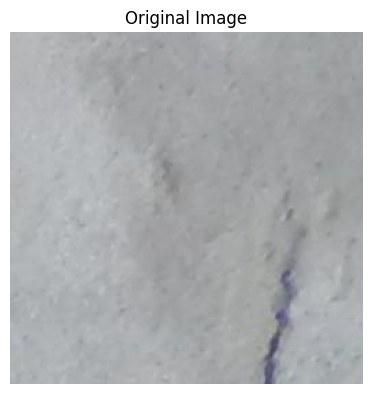

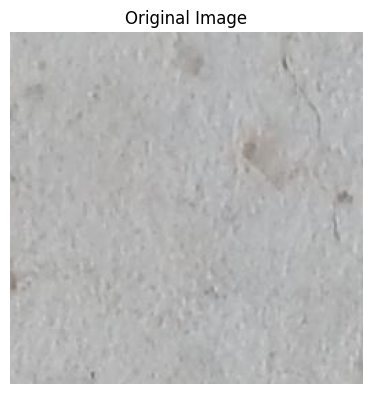

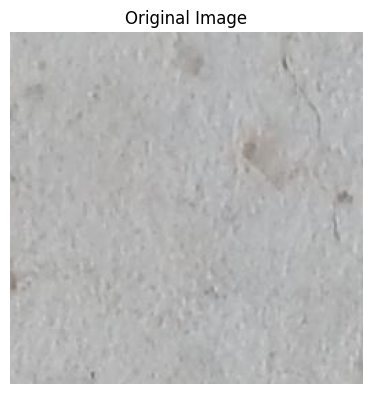

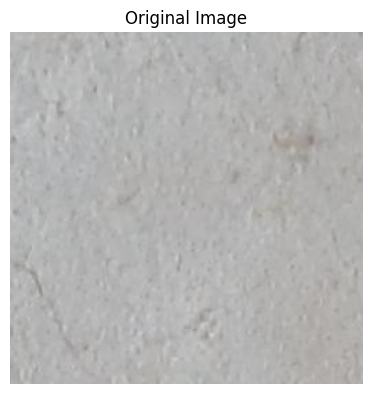

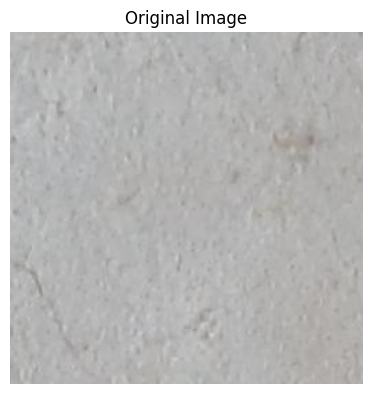

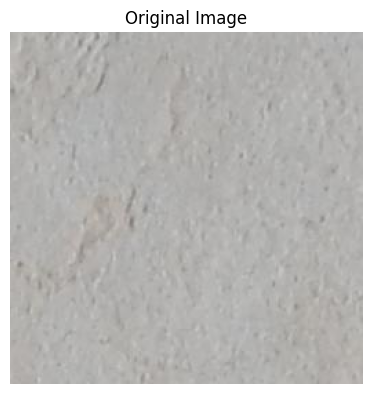

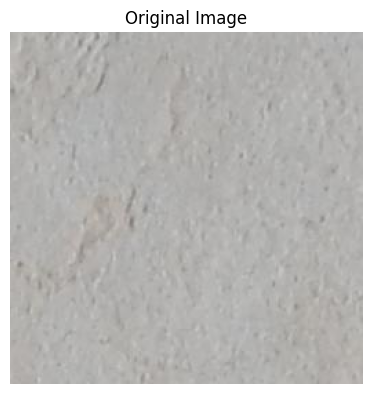

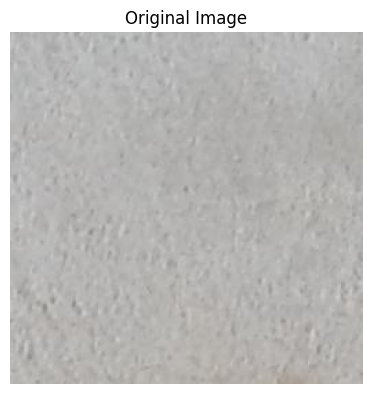

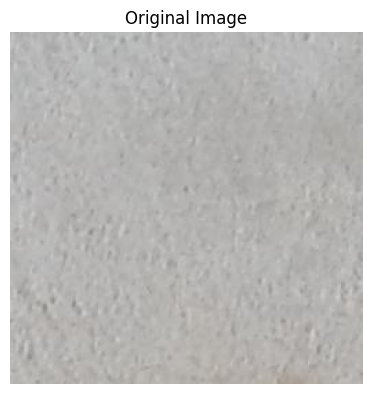

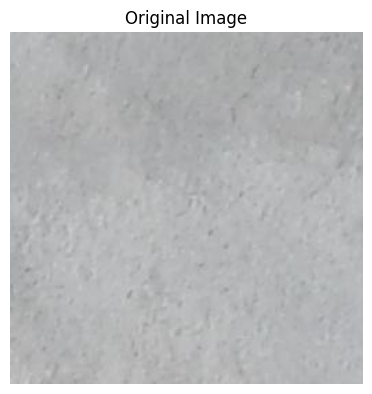

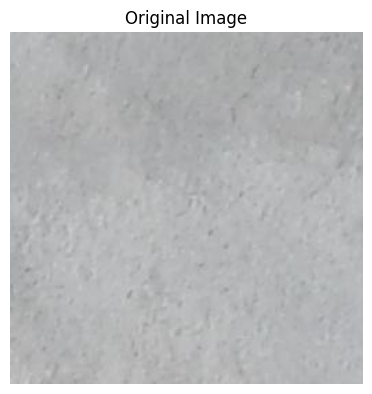

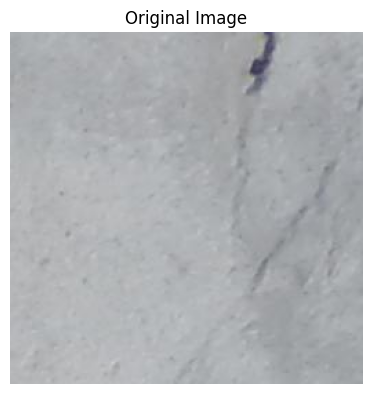

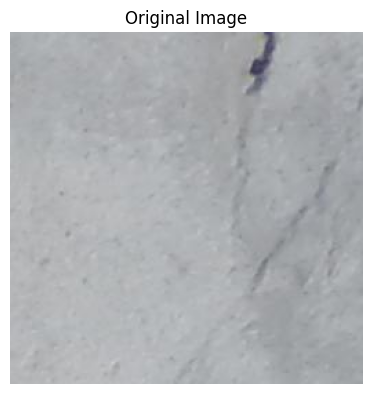

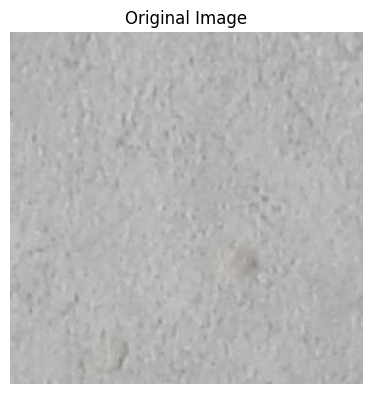

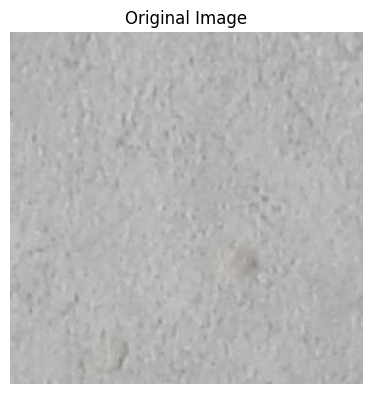

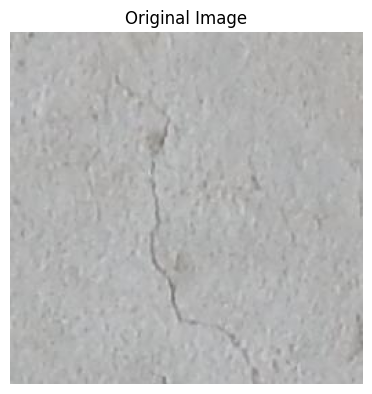

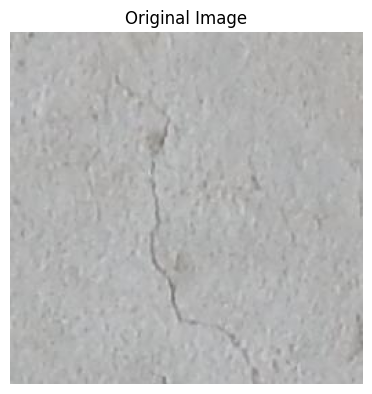

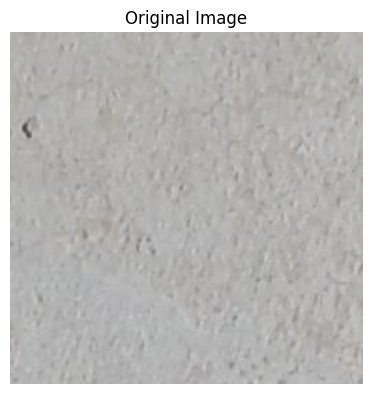

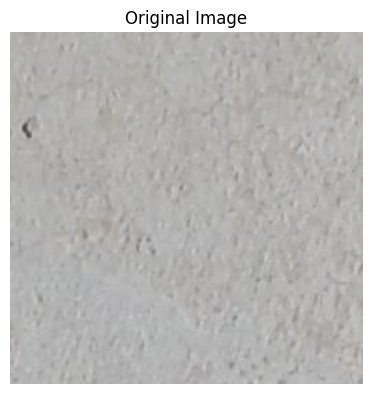

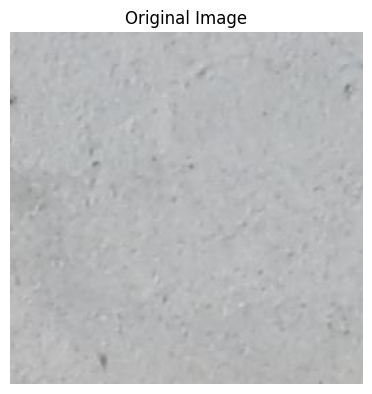

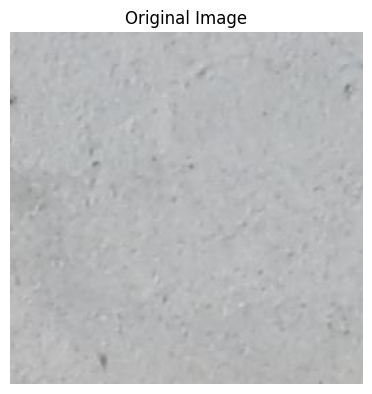

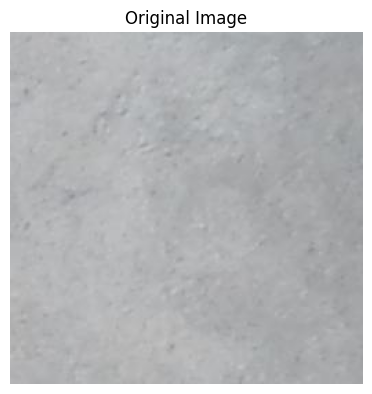

KeyboardInterrupt: 

In [ ]:
import torch
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the pre-trained CLIPSeg model and processor
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")

# Function to perform segmentation
def segment_image(image_path, prompt):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    inputs = processor(text=prompt, images=image, return_tensors="pt")

    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the segmentation mask
    mask = outputs.logits.sigmoid().squeeze().cpu().numpy()

    # Display the image and the segmentation mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.show()

# Directory containing image dataset
image_dir = '/content/drive/MyDrive/D'

# List of prompts
prompts = ["cracked", "uncracked"]
for condition in ["CD", "UD"]:
    condition_path = os.path.join(image_dir, condition)
    for image_name in os.listdir(condition_path):
        image_path = os.path.join(condition_path, image_name)

        #segmentation for each prompt
        for prompt in prompts:
            segment_image(image_path, prompt)


In [ ]:
!pip install torch torchvision transformers



In [ ]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-qxipc6uw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-qxipc6uw
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=7775fffcde015566c93fb621f1b3471773970c84709ebbb8b9bfa8e0d9206416
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9s1rnwz/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import torch
import clip
from PIL import Image
import os

# Load the pre-trained CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

# Function to classify an image
def classify_image(img_path, prompts):
    # Load and preprocess the image
    image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)

    # Tokenize the prompts
    text_inputs = torch.cat([clip.tokenize(prompt) for prompt in prompts]).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_inputs)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    # Get the most similar prompt
    values, indices = similarity[0].topk(1)
    return prompts[indices[0]], values[0].item()

# Directory containing your image dataset
image_dir = '/content/drive/MyDrive/D'

# List of prompts to test
prompts = ["a cracked image", "an uncracked image"]

# Loop through each condition (cracked, uncracked) in the dataset
for condition in ["CD", "UD"]:
    condition_path = os.path.join(image_dir, condition)

    # Loop through each image in the condition folder
    for image_name in os.listdir(condition_path):
        image_path = os.path.join(condition_path, image_name)

        # Classify the image
        prediction, confidence = classify_image(image_path, prompts)
        print(f"Image: {image_name}, Prediction: {prediction}, Confidence: {confidence:.2f}%")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Image: 7039-117.jpg, Prediction: an uncracked image, Confidence: 0.70%
Image: 7039-119.jpg, Prediction: an uncracked image, Confidence: 0.70%
Image: 7039-120.jpg, Prediction: an uncracked image, Confidence: 0.71%
Image: 7039-133.jpg, Prediction: an uncracked image, Confidence: 0.66%
Image: 7039-200.jpg, Prediction: an uncracked image, Confidence: 0.52%
Image: 7039-201.jpg, Prediction: an uncracked image, Confidence: 0.58%
Image: 7039-202.jpg, Prediction: an uncracked image, Confidence: 0.73%
Image: 7040-8.jpg, Prediction: an uncracked image, Confidence: 0.70%
Image: 7040-26.jpg, Prediction: an uncracked image, Confidence: 0.62%
Image: 7040-36.jpg, Prediction: an uncracked image, Confidence: 0.63%
Image: 7040-44.jpg, Prediction: an uncracked image, Confidence: 0.62%
Image: 7040-45.jpg, Prediction: an uncracked image, Confidence: 0.65%
Image: 7040-46.jpg, Prediction: an uncracked image, Confidence: 0.73%
Image: 7040-48.jpg, Prediction: an uncracked image, Confidence: 0.70%
Image: 7040-51

KeyboardInterrupt: 